# How it works - Fundamental Recommender Systems with Python

Author: Cleiber Garcia

Pourpose: Develop competencies on how to use Fundamental Recommender Systems with Python

This Notebook was produced as part of my studies of the course 'Python for Data Science and Machine Learning Bootcamp', taught by Mr Jose Portilla, Head of Data Science at Pierian Training. The course is offered ad Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784218?start=15#overview).

Although the degree of similarity between this notebook and the notebook written by Jose Portillo for this course is almos 100%, I assure you that I wrote it line by line. Also, I took the liberty to make some changes in order to clariry some examples or to make code more readable, when I judged it apropriate.

For more information, please contact me at cleiber.garcia@gmail.com

# 1. Background

This is not a true robust recommendation system, to describe it more accurately,it just tells us what movies/items are most similar to our movie choice.

# 2. Import Python Modules

In [1]:
import numpy as np
import pandas as pd

# 3. Load the Working Dataset

In [8]:
# Load item ratings by users
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
user_data = pd.read_csv('u.data', sep='\t', names=column_names)

In [9]:
user_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
# Load the movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
# Merge item ratings by users and movie titles
df = pd.merge(user_data, movie_titles, on='item_id') 
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# 4. Exploratory Data Analysis

## 4.1 Visualization Imports

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## 4.2 Preparation of the Data for Visualization

In [15]:
# Creating a ratings dataframe populated with the average rating 
# and number of ratings for each movie
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
# Set a new column with the number of ratings
ratings['num.of.ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num.of.ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## 4.3 Histogram of the number of ratings

<Axes: >

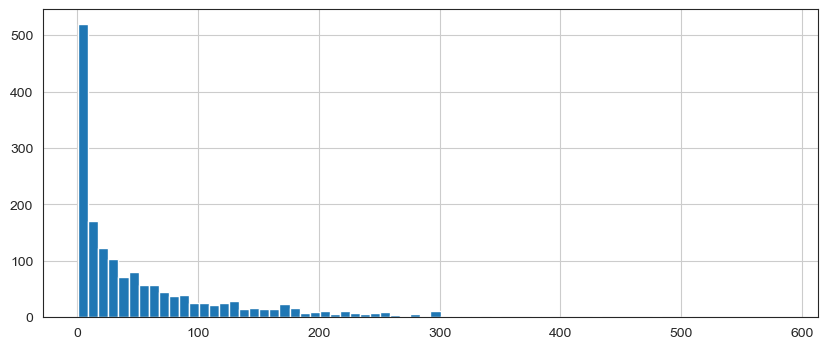

In [24]:
plt.figure(figsize=(10,4))

ratings['num.of.ratings'].hist(bins=70)

<Axes: >

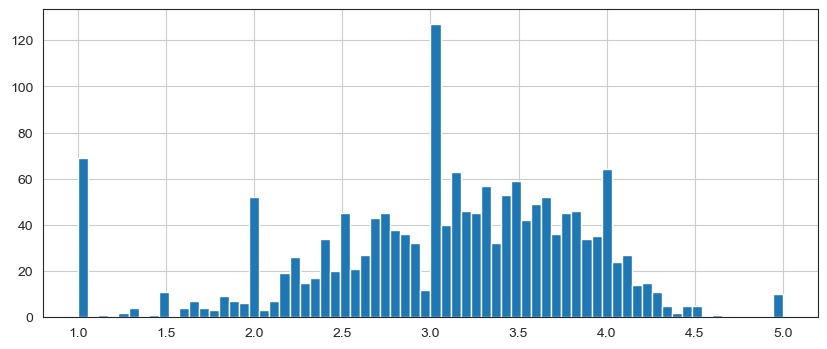

In [25]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

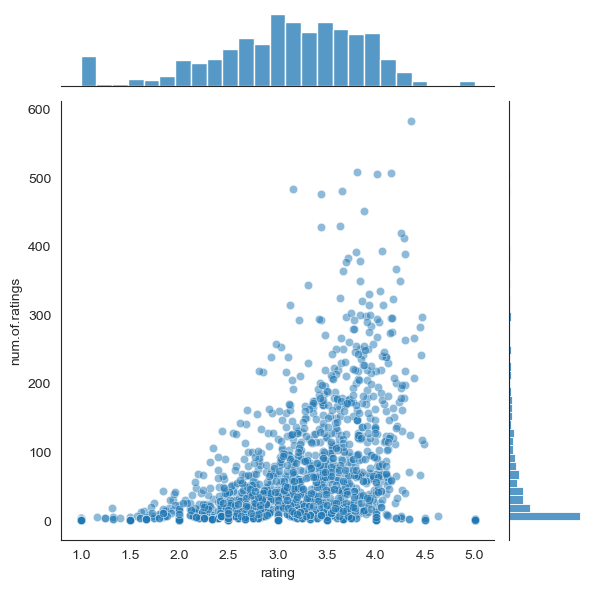

In [26]:
sns.jointplot(x='rating', y='num.of.ratings', data=ratings, alpha=0.5)

# 5. Recommending Similar Movies

## 5.1 Matrix with User Id versus Movie Rating

In [57]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [58]:
df.shape

(100003, 5)

In [59]:
movie_matrix = df.pivot_table(index='user_id',
                             columns='title',
                             values='rating')

In [60]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
ratings.columns

Index(['rating', 'num.of.ratings'], dtype='object')

In [62]:
# Most rated movie
ratings.sort_values('num.of.ratings', ascending=False).head()

,rating,num.of.ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [63]:
# Get Star Wars user rating
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [64]:
# Get movies similar to Star Wars
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars

C:\Users\Cleiber\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Cleiber\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [65]:
# Removing NaN and using DataFrame instead of Series
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [68]:
corr_starwars.sort_values('Correlation', ascending=False).head()

,Correlation,num.of.ratings
title,,
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
"Beans of Egypt, Maine, The (1994)",1.0,2
Safe Passage (1994),1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [67]:
# Join corr_starwars with Ratings
corr_starwars = corr_starwars.join(ratings['num.of.ratings'])
corr_starwars

,Correlation,num.of.ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [69]:
# Filtering out movies with less than 100 user ratings
corr_starwars['num.of.ratings'] > 100

title
'Til There Was You (1997)                False
1-900 (1994)                             False
101 Dalmatians (1996)                     True
12 Angry Men (1957)                       True
187 (1997)                               False
                                         ...  
Young Guns II (1990)                     False
Young Poisoner's Handbook, The (1995)    False
Zeus and Roxanne (1997)                  False
unknown                                  False
Á köldum klaka (Cold Fever) (1994)       False
Name: num.of.ratings, Length: 1664, dtype: bool

In [70]:
corr_starwars[corr_starwars['num.of.ratings'] > 100].sort_values('Correlation', 
                                                                ascending=False).head()

,Correlation,num.of.ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
